In [30]:
import nideconv

In [31]:
import glob
import re

reg = re.compile('.*/(?P<ds>ds-[0-9]+)/.*/sub-(?P<subject>[0-9]+)_task-randomdotmotion_run-(?P<run>[0-9]+)_space-T1w_desc-preproc_desc-(?P<mask>.+)_subroi-(?P<subroi>.+)_roi.csv')

In [32]:
fns = glob.glob('/data/bias_task/derivatives/ds-*/extracted_signal/sub-*/func/*.csv')

In [33]:
import pandas as pd

In [5]:
df = []

for fn in fns:
    
    if reg.match(fn):
    
        d = pd.read_csv(fn, index_col=0).mean(1).to_frame('signal')
        meta = reg.match(fn).groupdict()

        for key in meta:
            d[key] = meta[key]

        d.index.name = 'frame'
        d.reset_index()
        d['subject'] = d.apply(lambda row: '{ds}.{subject}'.format(**row.to_dict()), 1)
        
        
        d['mask'] = d.apply(lambda row: '{mask}-{subroi}'.format(**row.to_dict()), 1)
        d.drop('ds', 1, inplace=True)
        df.append(d)
    
df = pd.concat(df)
df = df.pivot_table(index=['subject', 'run', 'frame'], columns='mask', values='signal')

In [35]:
reg = re.compile('.*/(?P<ds>ds-[0-9]+)/.*/sub-(?P<subject>[0-9]+)_task-randomdotmotion_run-(?P<run>[0-9]+)_events.tsv')

In [36]:
events = []
for fn in glob.glob('/data/bias_task/derivatives/ds-*/event_files/*.tsv'):
    meta = reg.match(fn).groupdict()
    
    d = pd.read_table(fn)
    
    for key in meta:
        d[key] = meta[key]
    
    d['subject'] = d.apply(lambda row: '{ds}.{subject}'.format(**row.to_dict()), 1)
    d.drop('ds', 1, inplace=True)
    events.append(d.copy())

events = pd.concat(events)


events['original_onset'] = events['onset'].copy()
events['onset'] = events['original_onset'] - 3

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """


In [37]:
reg = re.compile('.*/(?P<ds>ds-[0-9]+)/.*/sub-(?P<subject>[0-9]+)_task-randomdotmotion_run-(?P<run>[0-9]+)_desc-confounds_regressors.tsv')

fns = glob.glob('/data/bias_task/derivatives/ds-*/fmriprep_confounds/sub-*_task-randomdotmotion_run-*_desc-confounds_regressors.tsv')

confounds = []
for fn in fns:
    meta = reg.match(fn).groupdict()
    d = pd.read_table(fn)
    
    for key in meta:
        d[key] = meta[key]
        
    d['subject'] = d.apply(lambda row: '{ds}.{subject}'.format(**row.to_dict()), 1)
    d.drop('ds', 1, inplace=True)        
        
    confounds.append(d)
    
confounds = pd.concat(confounds)

confounds = confounds.set_index(['subject', 'run'])

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



# Only Cue

/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new

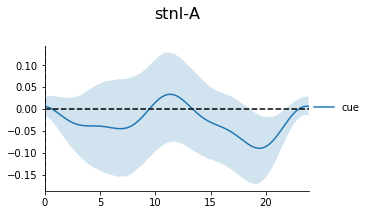

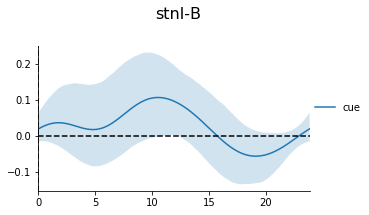

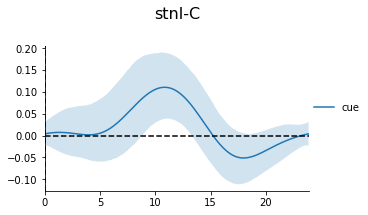

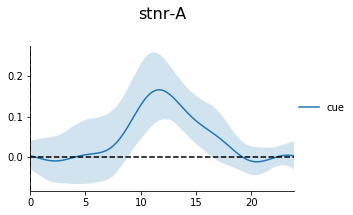

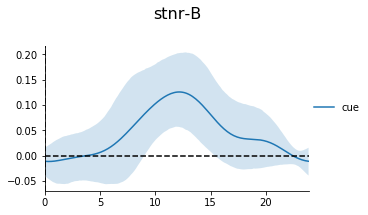

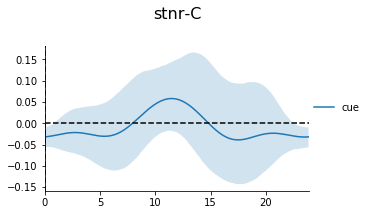

In [38]:
include_confounds = include = [u'dvars',u'framewise_displacement', u'a_comp_cor_00', u'a_comp_cor_01', u'a_comp_cor_02', u'a_comp_cor_03', u'a_comp_cor_04', u'a_comp_cor_05', u'cosine00', u'cosine01', u'cosine02', u'cosine03', u'cosine04', u'cosine05', u'cosine06', u'cosine07', u'cosine08', u'cosine09', u'cosine10', u'cosine11', u'cosine12', u'cosine13', u'cosine14', u'cosine15']#, u'trans_x', u'trans_y', u'trans_z', u'rot_x', u'rot_y', u'rot_z']

events_ = events.copy()
events_ = events_[events_.trial_type.isin(['cue_left', 'cue_right', 'cue_neutral'])]
events_['trial_type'] = 'cue'

gf = nideconv.GroupResponseFitter(df, events_, 1/3., confounds=confounds[include_confounds].reset_index())
gf.add_event('cue', interval=[0, 24], basis_set='fourier', n_regressors=9)

gf.fit()
gf.plot_groupwise_timecourses(event_types=['cue'], ci=95)

# Only stimulus

/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new

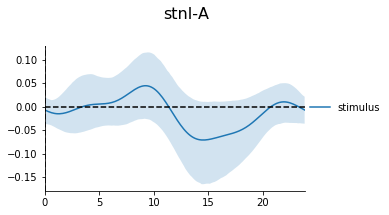

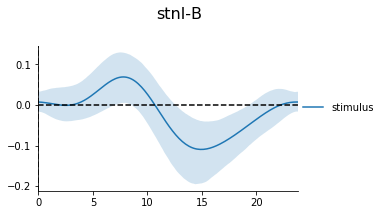

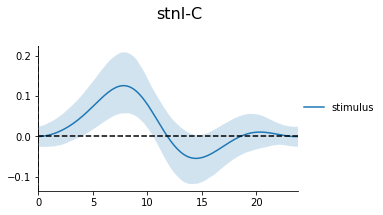

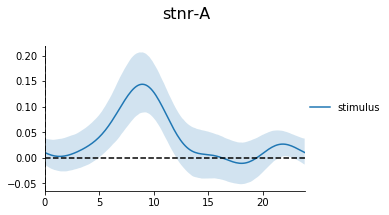

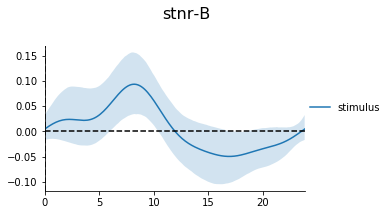

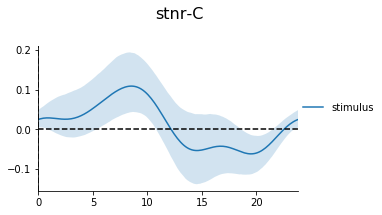

In [39]:
include_confounds = include = [u'dvars',u'framewise_displacement', u'a_comp_cor_00', u'a_comp_cor_01', u'a_comp_cor_02', u'a_comp_cor_03', u'a_comp_cor_04', u'a_comp_cor_05', u'cosine00', u'cosine01', u'cosine02', u'cosine03', u'cosine04', u'cosine05', u'cosine06', u'cosine07', u'cosine08', u'cosine09', u'cosine10', u'cosine11', u'cosine12', u'cosine13', u'cosine14', u'cosine15']#, u'trans_x', u'trans_y', u'trans_z', u'rot_x', u'rot_y', u'rot_z']

events_ = events.copy()
events_ = events_[events_.trial_type.isin(['easy', 'hard'])]
events_['trial_type'] = 'stimulus'

gf = nideconv.GroupResponseFitter(df, events_, 1/3., confounds=confounds[include_confounds].reset_index())
gf.add_event('stimulus', interval=[0, 24], basis_set='fourier', n_regressors=9)


gf.fit()
gf.plot_groupwise_timecourses(event_types=['stimulus'], ci=95)

# Easy / Hard

/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new

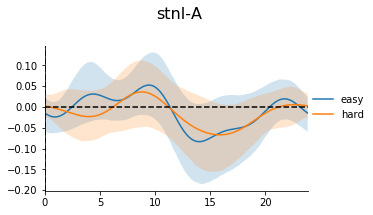

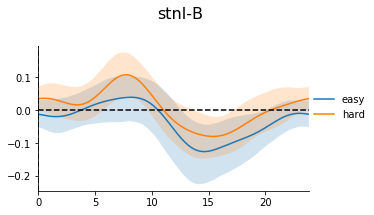

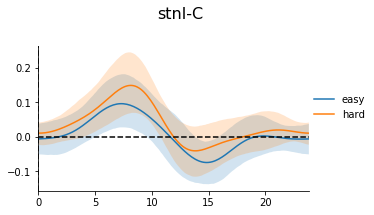

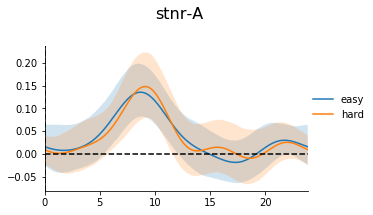

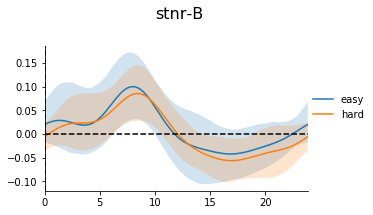

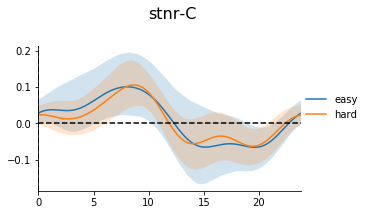

In [45]:
include_confounds = include = [u'dvars',u'framewise_displacement', u'a_comp_cor_00', u'a_comp_cor_01', u'a_comp_cor_02', u'a_comp_cor_03', u'a_comp_cor_04', u'a_comp_cor_05', u'cosine00', u'cosine01', u'cosine02', u'cosine03', u'cosine04', u'cosine05', u'cosine06', u'cosine07', u'cosine08', u'cosine09', u'cosine10', u'cosine11', u'cosine12', u'cosine13', u'cosine14', u'cosine15']#, u'trans_x', u'trans_y', u'trans_z', u'rot_x', u'rot_y', u'rot_z']

events_ = events.copy()
events_ = events_[events_.trial_type.isin(['easy', 'hard'])]

gf = nideconv.GroupResponseFitter(df, events_, 1/3., confounds=confounds[include_confounds].reset_index())
gf.add_event('easy', interval=[0, 24], basis_set='fourier', n_regressors=9)
gf.add_event('hard', interval=[0, 24], basis_set='fourier', n_regressors=9)


gf.fit()
gf.plot_groupwise_timecourses(event_types=['easy', 'hard'], ci=95)

# Stimulus and cue

In [50]:
import matplotlib.pyplot as plt

/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new

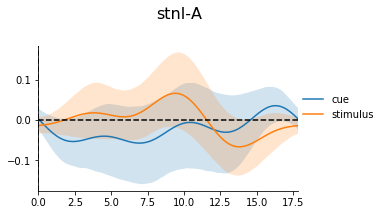

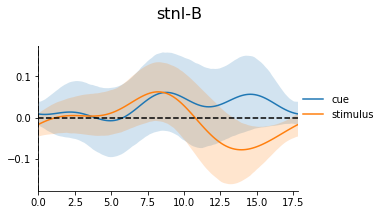

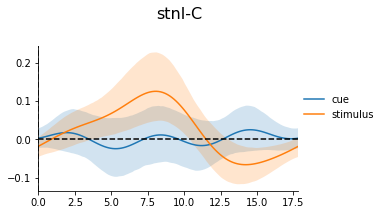

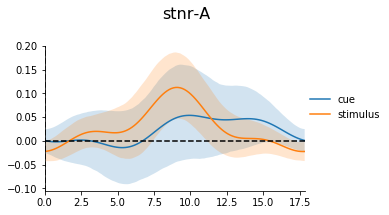

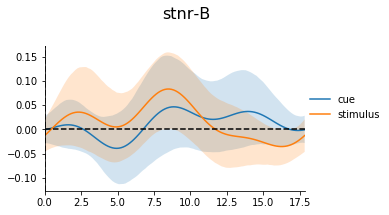

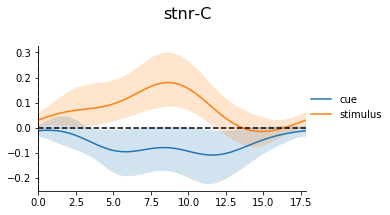

In [51]:
events_ = events.copy()
events_ = events_[events_.trial_type.isin(['easy', 'hard', 'cue_neutral', 'cue_left', 'cue_right'])]
events_.loc[events_.trial_type.isin(['easy', 'hard']), 'trial_type'] = 'stimulus'
events_.loc[events_.trial_type.isin(['cue_neutral', 'cue_left', 'cue_right']), 'trial_type'] = 'cue'

gf = nideconv.GroupResponseFitter(df, events_, 1/3., confounds=confounds[include_confounds].reset_index())
gf.add_event('stimulus', interval=[0, 18], basis_set='fourier', n_regressors=7)
gf.add_event('cue', interval=[0, 18], basis_set='fourier', n_regressors=7)


gf.fit()
gf.plot_groupwise_timecourses(event_types=['cue', 'stimulus'], ci=95)

plt.savefig("/Users/gilles/git/bias_task/figures/deconv.pdf")

In [54]:
tc = gf.get_subjectwise_timecourses(melt=True)

/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new

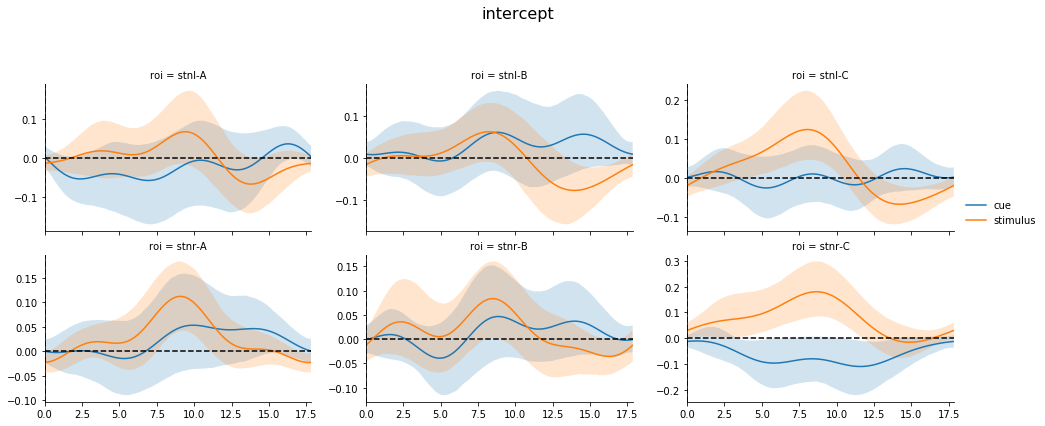

In [59]:
gf.plot_groupwise_timecourses(event_types=['cue', 'stimulus'], ci=95, plots='covariate', col='roi', col_wrap=3)

plt.savefig('/Users/gilles/git/bias_task/figures/deconv.png')

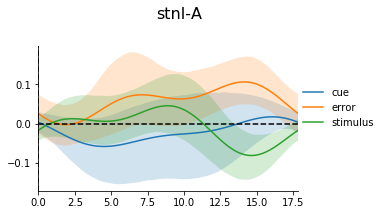

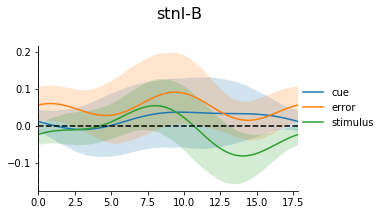

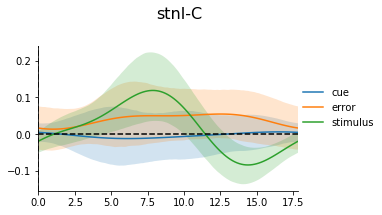

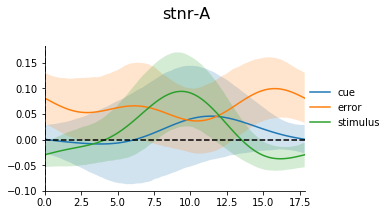

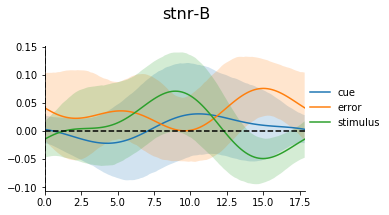

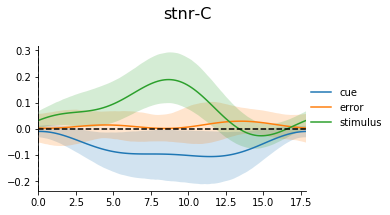

In [64]:
events_ = events.copy()
events_ = events_[events_.trial_type.isin(['easy', 'hard', 'cue_neutral', 'cue_left', 'cue_right', 'error'])]
events_.loc[events_.trial_type.isin(['easy', 'hard']), 'trial_type'] = 'stimulus'
events_.loc[events_.trial_type.isin(['cue_neutral', 'cue_left', 'cue_right']), 'trial_type'] = 'cue'

gf = nideconv.GroupResponseFitter(df, events_, 1/3., confounds=confounds[include_confounds].reset_index())
gf.add_event('stimulus', interval=[0, 18], basis_set='fourier', n_regressors=5)
gf.add_event('cue', interval=[0, 18], basis_set='fourier', n_regressors=5)
gf.add_event('error', interval=[0, 18], basis_set='fourier', n_regressors=5)

gf.fit()
gf.plot_groupwise_timecourses(event_types=['cue', 'stimulus', 'error'], ci=95)

In [60]:
from nistats.contrasts import compute_contrast
from nistats.first_level_model import run_glm
from nistats.design_matrix import make_first_level_design_matrix

import numpy as np

/Users/gilles/miniconda3/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [110]:
results = []

contrasts = ['cue_left', 'cue_right', 'cue_neutral', 'hard', 'easy', 'error']
for (subject, run), e in events.groupby(['subject', 'run']):
    
    c = confounds.loc[(subject, run), include_confounds]
    c = c.fillna(method='bfill')
    
    
    e = e[e.trial_type.isin(contrasts)]
    e['duration'] = 2.
    frame_times = df.loc[subject, run].index.get_level_values('frame') * 3
    X = make_first_level_design_matrix(frame_times, e, drift_order=None, drift_model=None, add_regs=c.values, add_reg_names=include_confounds,
                                      hrf_model='glover')
    
    X /= X.max()
    
    labels, estimates = run_glm(df.loc[subject, run].values, X.values)
    
    contrast_matrix = np.eye(X.shape[1])
    basic_contrasts = dict([(column, contrast_matrix[i]) for i, column in enumerate(X.columns)])
    
    for contrast in contrasts:
        d = dict(zip(df.columns, compute_contrast(labels, estimates, basic_contrasts[contrast], contrast_type='t').effect_size()))
        d['subject'] = subject
        d['run'] = run
        d['contrast'] = contrast        
        results.append(d)


/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/gilles/miniconda3/lib/python3.7/site-packages/nistats/hemodynamic_models.py:268: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  frame_times.max() * (1 + 1. / (n - 1)), n_hr)
/Users/gilles/miniconda3/lib/python3.7/site-packages/nistats/hemodynamic_models.py:55: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  time_stamps = np.linspace(0, time_length, float(time_length) / dt)


In [111]:
results = pd.DataFrame(results)

results = results.melt(id_vars=['subject', 'run', 'contrast'], var_name='mask')

results['dataset'] = results.subject.apply(lambda row: row[:5])
import seaborn as sns

/Users/gilles/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


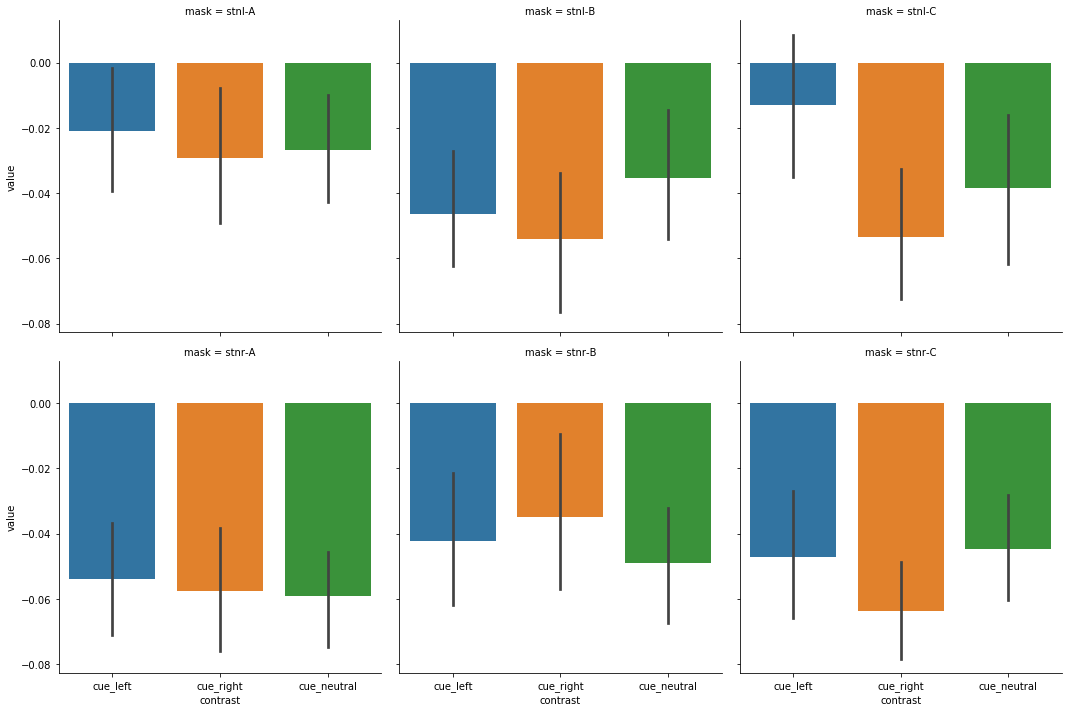

In [145]:
sns.factorplot('contrast', 'value', col='mask', col_wrap=3, data=results[results.contrast.isin(['cue_left', 'cue_right', 'cue_neutral'])], kind='bar', ci=67)

plt.savefig('/Users/gilles/git/bias_task/figures/cue_glm.png')

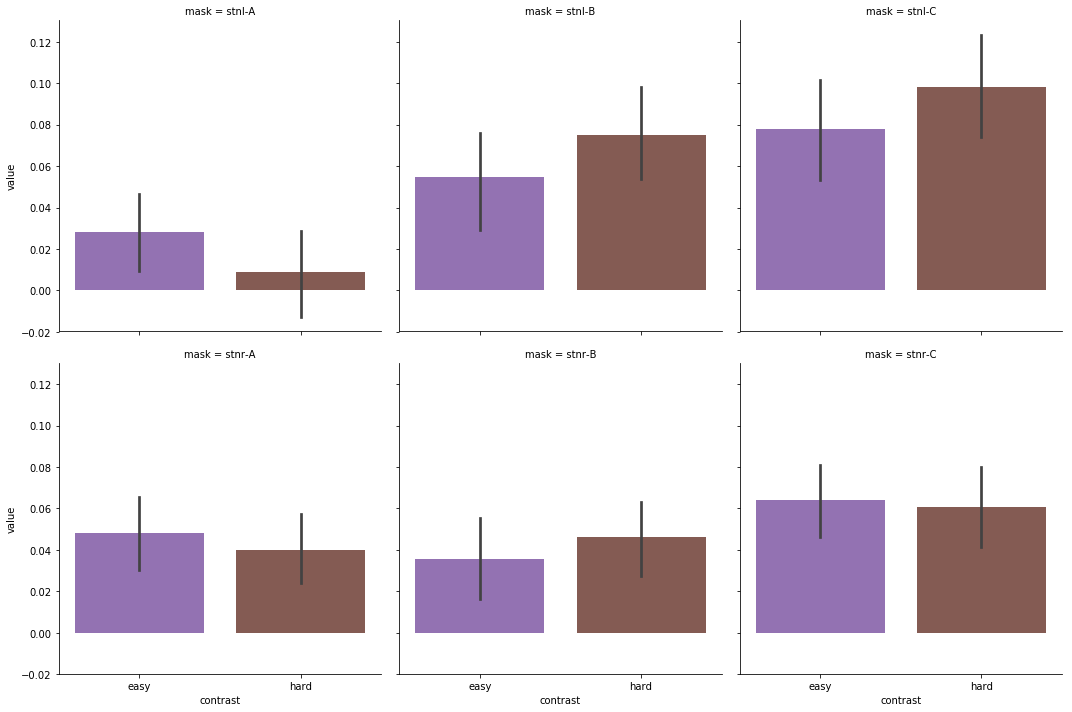

In [163]:
sns.factorplot('contrast', 'value', col='mask', col_wrap=3, data=results[results.contrast.isin(['easy', 'hard'])], kind='bar', ci=67,
              order=['easy', 'hard'],
              palette=sns.color_palette()[4:])

plt.savefig('/Users/gilles/git/bias_task/figures/stimulus_glm.png')

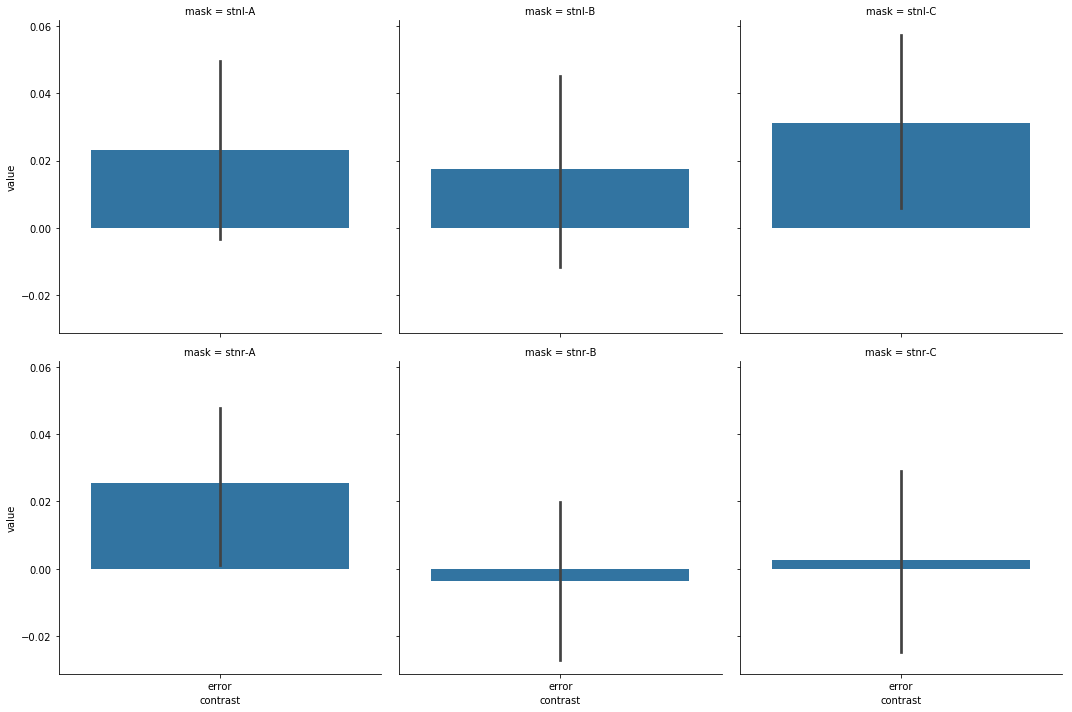

In [150]:
sns.factorplot('contrast', 'value', col='mask', col_wrap=3, data=results[results.contrast.isin(['error'])], kind='bar', ci=67)

In [194]:
pars = pd.read_pickle('/data/bias_task/derivatives/all_subjectwise_parameters.pkl')
results['subject'] = results.subject.apply(lambda d: d[-2:])
results = results.set_index(['dataset', 'subject'])
results_ = results.pivot_table(index=['dataset', 'subject'], columns=['mask', 'contrast'], values='value')

AttributeError: 'DataFrame' object has no attribute 'subject'

In [195]:
tmp = pars[['ddm z_cue_regressor']]

tmp = tmp.groupby('dataset').apply(lambda d: (d - d.mean()) / d.std())

In [196]:
cue_contrast = (results_.loc[:, (slice(None), 'cue_left')] + results_.loc[:, (slice(None), 'cue_right')].values)/2 - results_.loc[:, (slice(None), 'cue_neutral')].values
cue_contrast.columns = cue_contrast.columns.droplevel('contrast')

In [197]:
ss.ttest_1samp(cue_contrast, 0)

Ttest_1sampResult(statistic=array([-0.07584774, -1.52777652,  0.23835248,  0.27089179,  0.70493959,
       -0.7394361 ]), pvalue=array([0.94001245, 0.13639331, 0.81312748, 0.78821401, 0.48594751,
       0.46503234]))

In [198]:
# z-score cue contrast
cue_contrast = cue_contrast.groupby('dataset').apply(lambda x: (x - x.mean()) / x.std())

In [199]:
tmp = cue_contrast.merge(tmp, left_index=True, right_index=True).reset_index('dataset').melt(id_vars=['dataset', 'ddm z_cue_regressor'], var_name='mask')

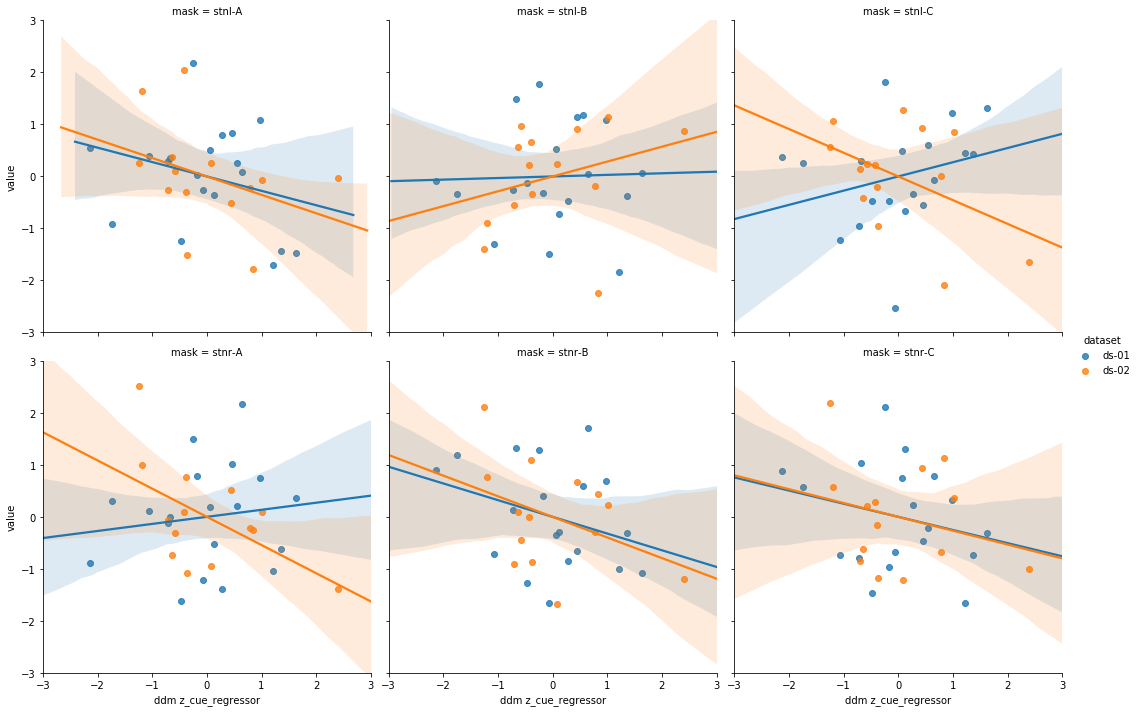

In [201]:
fac = sns.lmplot('ddm z_cue_regressor', 'value', tmp, 'dataset', col='mask', col_wrap=3, sharey=True)

fac.set(xlim=(-3, 3), ylim=(-3, 3))

plt.savefig('/Users/gilles/git/bias_task/figures/startpoint_corr.png')

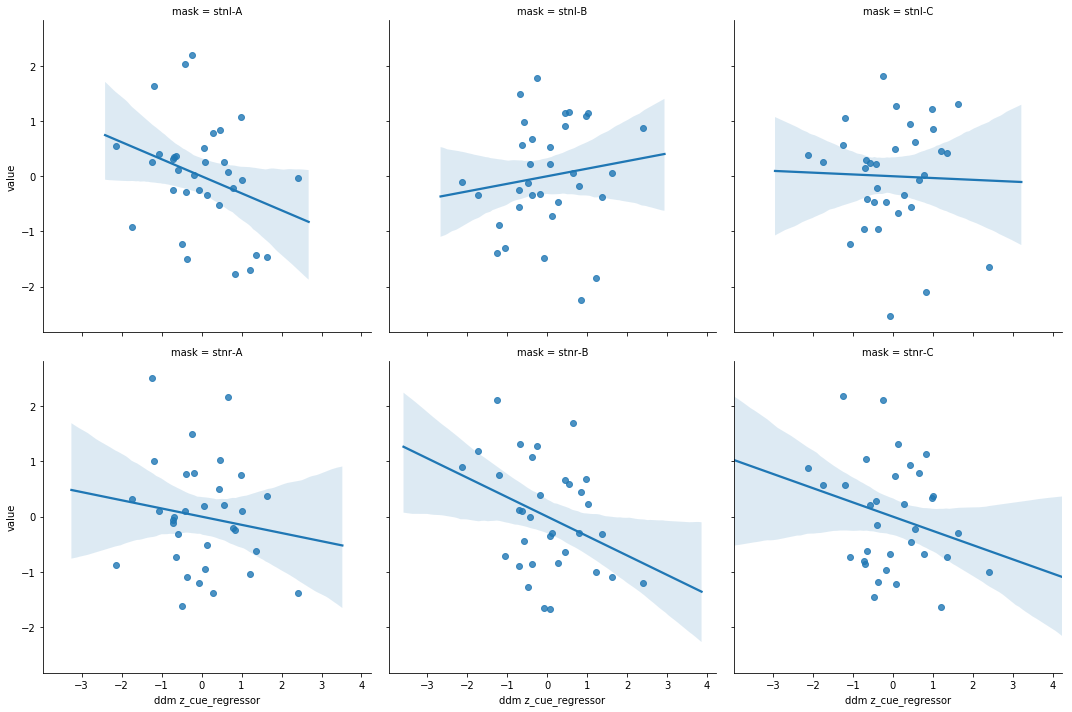

In [186]:
fac = sns.lmplot('ddm z_cue_regressor', 'value', tmp, col='mask', col_wrap=3, sharey=True)

In [187]:
import scipy.stats as ss

In [188]:
tmp = pd.DataFrame(tmp.groupby('mask').apply(lambda d: np.array(ss.pearsonr(d['value'], d['ddm z_cue_regressor']))))


tmp['r'] = tmp[0].apply(lambda x: x[0])
tmp['p'] = tmp[0].apply(lambda x: x[1])

,0,r,p
mask,,,
stnl-A,"[-0.30904096431219114, 0.08012228673507711]",-0.309041,0.080122
stnl-B,"[0.1374760951231831, 0.44550977261106484]",0.137476,0.445510
stnl-C,"[-0.032469857799977235, 0.8576392445314668]",-0.032470,0.857639
stnr-A,"[-0.1485016669237458, 0.40950131329371775]",-0.148502,0.409501
stnr-B,"[-0.35256886198922877, 0.044177581579672165]",-0.352569,0.044178
stnr-C,"[-0.25828918329584266, 0.14669478813352646]",-0.258289,0.146695


In [189]:
tmp[['r', 'p']].round(2)

,r,p
mask,,
stnl-A,-0.31,0.08
stnl-B,0.14,0.45
stnl-C,-0.03,0.86
stnr-A,-0.15,0.41
stnr-B,-0.35,0.04
stnr-C,-0.26,0.15


# Drift

In [219]:
tmp = pars[['ddm difficulty_effect']]
tmp = tmp.groupby('dataset').apply(lambda d: (d - d.mean()) / d.std())

In [220]:
difficulty_contrast = results_.loc[:, (slice(None), 'hard')] - results_.loc[:, (slice(None), 'easy')].values
difficulty_contrast.columns = difficulty_contrast.columns.droplevel('contrast')


In [221]:
ss.ttest_1samp(difficulty_contrast, 0)

Ttest_1sampResult(statistic=array([-1.51070605,  1.19389942,  1.12939946, -0.7669671 ,  0.64814583,
       -0.40445325]), pvalue=array([0.14067614, 0.24129302, 0.26712478, 0.44872297, 0.52151456,
       0.68857019]))

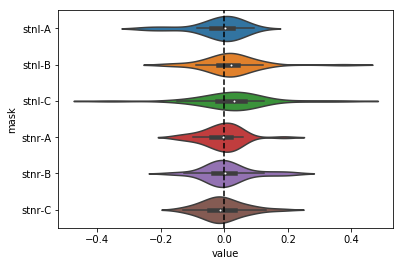

In [222]:
sns.violinplot('value', 'mask', data=difficulty_contrast.melt())
plt.axvline(0, c='k', ls='--')


In [223]:
difficulty_contrast = difficulty_contrast.groupby('dataset').apply(lambda x: (x - x.mean()) / x.std())

In [224]:
tmp = difficulty_contrast.merge(tmp, left_index=True, right_index=True).reset_index('dataset').melt(id_vars=['dataset', 'ddm difficulty_effect'], var_name='mask')

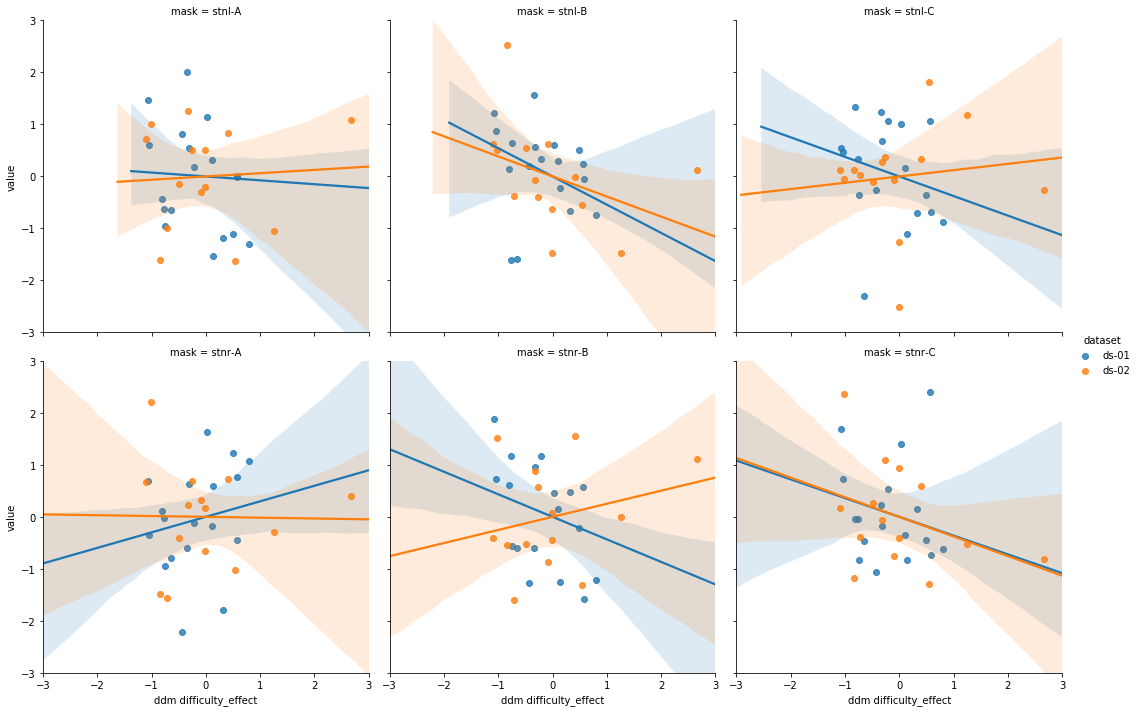

In [225]:
fac = sns.lmplot('ddm difficulty_effect', 'value', tmp, 'dataset', col='mask', col_wrap=3, sharey=True)

fac.set(xlim=(-3, 3), ylim=(-3, 3))

plt.savefig('/Users/gilles/git/bias_task/figures/drift_corr.png')

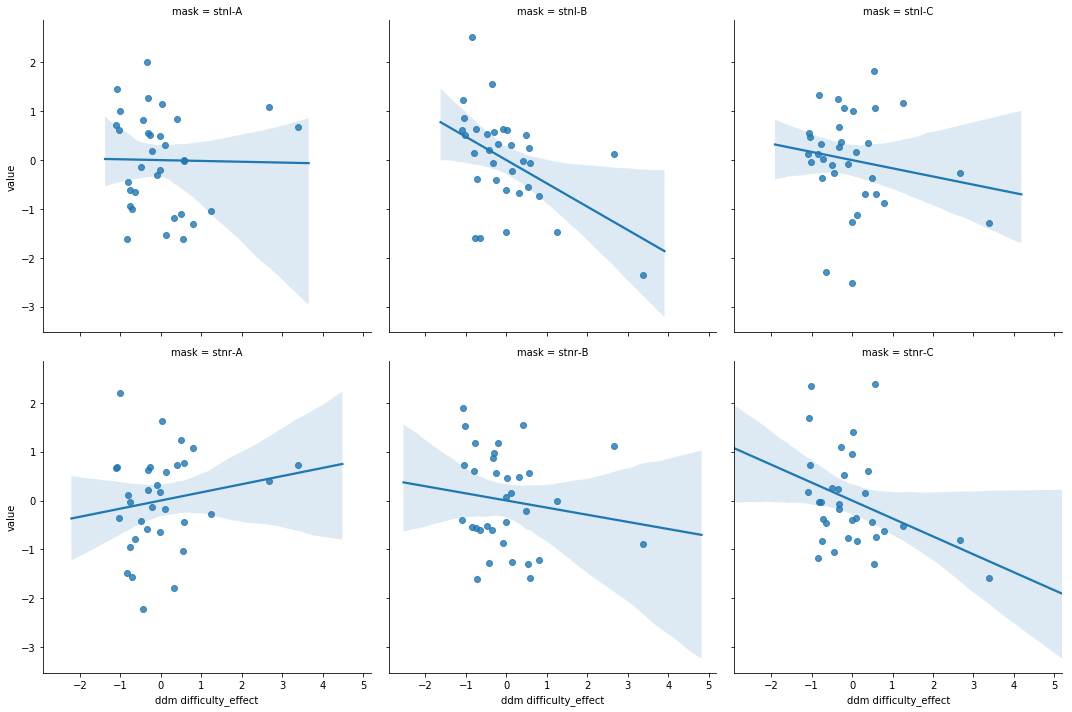

In [226]:
fac = sns.lmplot('ddm difficulty_effect', 'value', tmp, col='mask', col_wrap=3, sharey=True)

In [227]:
tmp = pd.DataFrame(tmp.groupby('mask').apply(lambda d: ss.pearsonr(d['value'], d['ddm difficulty_effect'])))

tmp['r'] = tmp[0].apply(lambda x: x[0])
tmp['p'] = tmp[0].apply(lambda x: x[1])

In [228]:
tmp[['r', 'p']].round(3)

,r,p
mask,,
stnl-A,-0.017,0.926
stnl-B,-0.477,0.005
stnl-C,-0.168,0.351
stnr-A,0.167,0.354
stnr-B,-0.146,0.417
stnr-C,-0.368,0.035
